Step1: Load the data

In [1]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import helper_functions

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (10,8)

# indicate paths to files

import os 

path_to_data = r"C:\Users\xy200\OneDrive\Desktop\24sping\program\lyrics.csv"
path_to_dictionary = r"C:\Users\xy200\OneDrive\Desktop\24sping\program\words.csv"

In [2]:
lyrics = pd.read_csv(path_to_data)
lyrics

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
0,Buried Alive,Hell Razah,Hip-hop,0.028395,...,0.0,0.0,0.0,0.0
1,Little Things,Danni Leigh,Country,0.024862,...,0.0,0.0,0.0,0.0
2,Open,Afu-Ra,Hip-hop,0.052198,...,0.0,0.0,0.0,0.0
3,Everything Is Shady,Cashis,Hip-hop,0.025597,...,0.0,0.0,0.0,0.0
4,Car Tu Portes Mon Nom (Live 2006),Diam's,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1664,Liebes Lied,Absolute Beginner,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
1665,As Lovely As You,Alison Krauss & Union Station,Country,0.065868,...,0.0,0.0,0.0,0.0
1666,Sucka Free,Afu-Ra,Hip-hop,0.080386,...,0.0,0.0,0.0,0.0
1667,The Hard Way,Kasey Chambers,Country,0.057143,...,0.0,0.0,0.0,0.0


In [3]:
lyrics.columns

Index(['Title', 'Artist', 'Genre', 'i', 'the', 'you', 'to', 'and', 'a', 'me',
       ...
       'seventh', 'capit', 'writer', 'motivo', 'bake', 'insist', 'santo', 'pe',
       'gee', 'colleg'],
      dtype='object', length=4820)

In [4]:
lyrics.loc[lyrics["Title"] == "In Your Eyes",['Title', 'Artist', 'Genre','like','love','the']]

,Title,Artist,Genre,like,love,the
962,In Your Eyes,Alison Krauss,Country,0.011905,0.059524,0.0


In [5]:
lyrics.drop(columns = ["Title", "Artist", "Genre"]).sum(axis = 1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1664    1.0
1665    1.0
1666    1.0
1667    1.0
1668    1.0
Length: 1669, dtype: float64

In [6]:
# The stemming process alters suffixes from related words. 
# For example, "manag" is the stemmed form of "manage", "manager", etc. Here is a table of words indicating the transformation.
stemming = pd.read_csv(path_to_dictionary)
stemming

,Stem,Word
0,día,día
1,pido,pido
2,hatr,hatred
3,pide,pide
4,yellow,yellow
...,...,...
4971,yell,yell
4972,at,at
4973,confess,confess
4974,sincer,sincere


Step2: Test data transform

In [7]:
# Compute the fraction of words in stemming that are unchanged under the stemming process
unchanged_words = (stemming['Word'] == stemming['Stem']).sum()
total_words = len(stemming)
q1_1 = unchanged_words/total_words
q1_1

0.7216639871382636

In [8]:
# Test the stemmed form of "message"
mask = stemming['Word'] == 'message'
q1_2 = stemming.loc[mask, 'Stem'].values[0]
q1_2

'messag'

In [9]:
# Reverse test, original word of stemmed form-the string "single"
original_words = stemming.loc[stemming['Stem'] == 'singl', 'Word'].tolist()

q1_3 = ["singl"] if "singl" not in original_words else original_words

q1_3

['singl']

In [10]:
# compute the number of characters removed in the stemming process
stemming["length difference"] = stemming["Word"].str.len() - stemming["Stem"].str.len()
stemming

,Stem,Word,length difference
0,día,día,0
1,pido,pido,0
2,hatr,hatred,2
3,pide,pide,0
4,yellow,yellow,0
...,...,...,...
4971,yell,yell,0
4972,at,at,0
4973,confess,confess,0
4974,sincer,sincere,1


In [11]:
# What word was shortened the most by the stemming process?
# Find the maximum length difference
max_length_difference = stemming['length difference'].max()

# Find the word(s) that corresponds to this maximum length difference
most_shortened_words = stemming[stemming['length difference'] == max_length_difference]['Word']

# Assuming there is only one such word, otherwise, you might get multiple words
q1_4 = most_shortened_words.iloc[0]

q1_4

'international'

Step3: Split lycrics into 2 datasets called training_set and testing_set

use training_set to determine an approach to classifying songs into genres.

compare the predicted genres and observed genres in the testing_set.

So training_set will help us to make classification and testing_set will help us to evaluate the classifications.

In [12]:
# 80% for train
training_proportion = 0.8

number_songs = len(lyrics)
number_training = int(number_songs * training_proportion)

In [14]:
# Randomly shuffled the rows of lyrics with the pandas function shuffle
lyrics_shuffled = lyrics.sample(frac = 1, random_state = 42)

training_set = lyrics_shuffled.iloc[:number_training]
testing_set = lyrics_shuffled.iloc[number_training:]

In [15]:
# Test data split
training_proportion_actual = len(training_set) / len(lyrics)

q2_0 = training_proportion_actual == training_proportion

q2_0

False

In [16]:
# Compute the proportion of Country songs in training_set and testing_set
# ensure that training_set and testing_set have a mix of the genres
proportion_country_training = (training_set['Genre'] == 'Country').mean()
proportion_country_testing = (testing_set['Genre'] == 'Country').mean()

print(proportion_country_training)
print(proportion_country_testing)

0.4943820224719101
0.5508982035928144


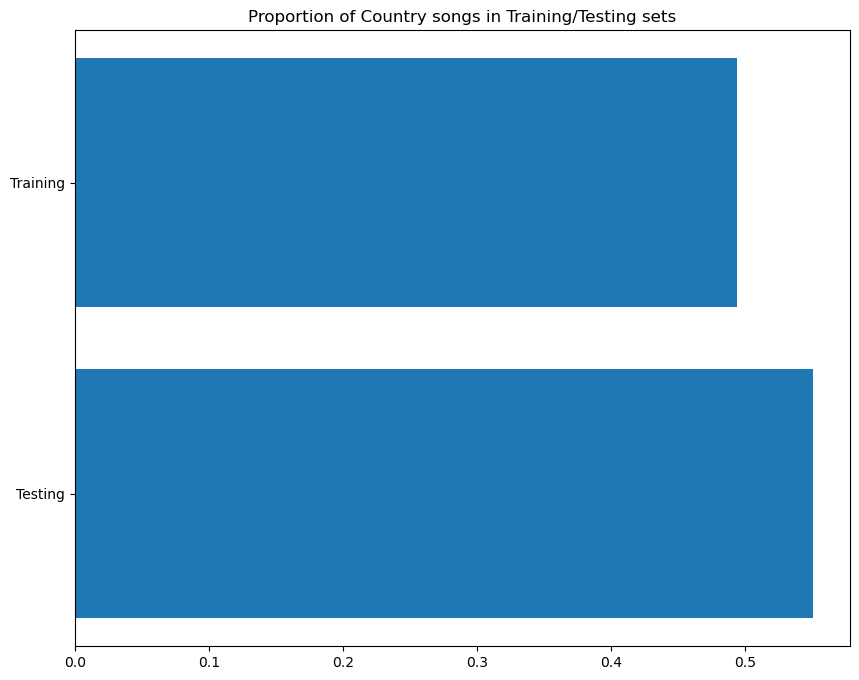

In [17]:
# generate a bar-chart from the proportions
plt.barh(["Testing","Training"], [proportion_country_testing, proportion_country_training])
plt.title("Proportion of Country songs in Training/Testing sets");

Step4: Classification-use the k-nearest neighbors approach to classification.

Each song in training_set and testing_set has a genre Country or Hip-hop for genre. However, we need to predict a genre for the songs in testing_set. If we want to classify a song in testing_set then we compare to the songs in training_set. We compare songs with the frequency of words. If the frequency of words in two songs are similar, then we expect the genre of the songs to be similar.

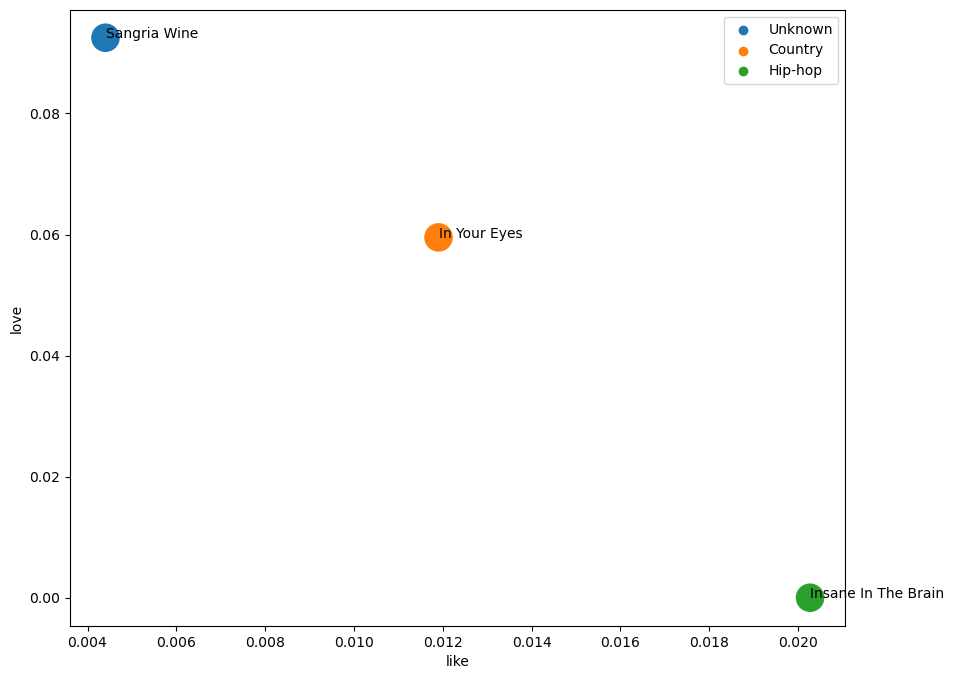

In [18]:
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

In [19]:
testing_set[testing_set["Title"] == "Sangria Wine"]

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
686,Sangria Wine,Jerry Jeff Walker,Country,0.088106,...,0.0,0.0,0.0,0.0


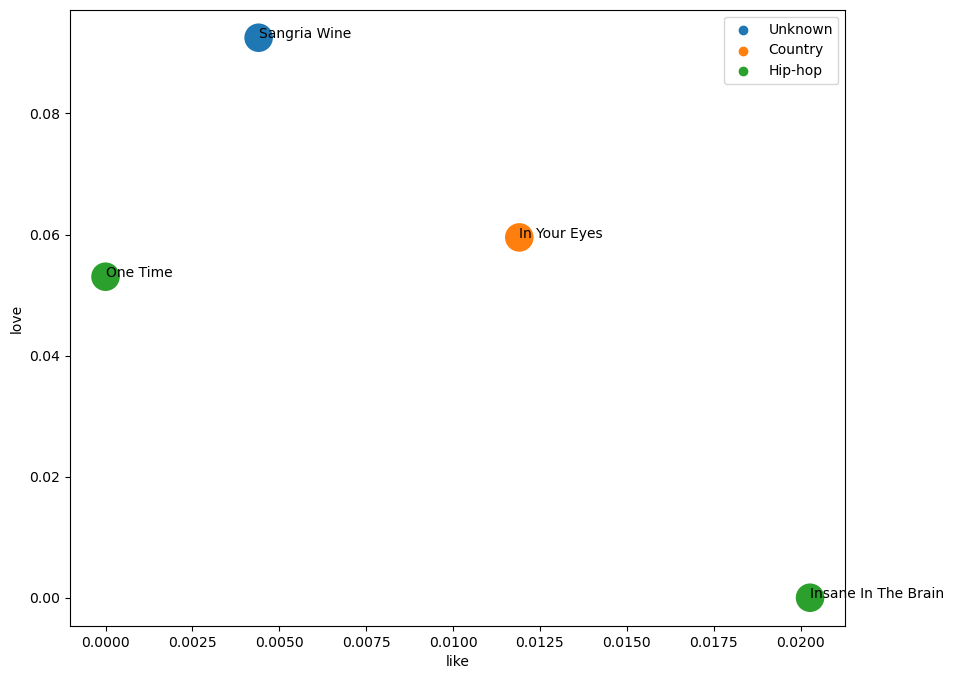

In [20]:
# Classifiy Sangria Wine as Country based on the words like and love
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "One Time", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

In [21]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",["like","love"]]

distance = np.sum((sangria_wine.values - in_your_eyes.values)**2)
distance = np.sqrt(distance)

distance

0.03382894432459689

In [22]:
one_time = training_set.loc[training_set["Title"] == "One Time", ["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine", ["like","love"]]

distance = np.sum((sangria_wine.values - one_time.values)**2)
distance = np.sqrt(distance)

distance

0.03972572223189776

In [23]:
def distance_two_songs(row_1, row_2, words):
    coordinates_1 = row_1[words].astype(float)
    coordinates_2 = row_2[words].astype(float)
    squared_differences = (coordinates_1 - coordinates_2) ** 2

    distance = np.sqrt(squared_differences.sum())
    
    return distance

In [24]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",:] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",:]

q2_1 = distance_two_songs(in_your_eyes.iloc[0], sangria_wine.iloc[0], ['like', 'love', 'the'])

print(q2_1)

0.040367822490959014


In [25]:
words = ["like", "love", "the"]
row = testing_set.loc[testing_set["Title"] == "Sangria Wine", :]

distance = helper_functions.compute_distances(row, training_set, words)
distance

array([0.09519904, 0.07280497, 0.1000939 , ..., 0.0892561 , 0.09677655,
       0.09382014])

In [26]:
training_set_with_distance = training_set.copy()
training_set_with_distance["distance"] = distance
training_set_with_distance

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
941,Bring It On Home To Me,Mickey Gilley,Country,0.052632,...,0.0,0.0,0.0,0.095199
988,Early morning riser,Pure Prairie League,Country,0.033962,...,0.0,0.0,0.0,0.072805
405,We Danced,Brad Paisley,Country,0.072289,...,0.0,0.0,0.0,0.100094
722,When We All Get To Heaven,Brad Paisley,Country,0.000000,...,0.0,0.0,0.0,0.098729
1614,Between The Daylight And The Dark,Mary Gauthier,Country,0.000000,...,0.0,0.0,0.0,0.124163
...,...,...,...,...,...,...,...,...,...
658,I Can,Nas,Hip-hop,0.108876,...,0.0,0.0,0.0,0.092734
1357,Sinequanon,Hybrid,Hip-hop,0.000000,...,0.0,0.0,0.0,0.092137
1019,Taste This,Mýa,Hip-hop,0.051667,...,0.0,0.0,0.0,0.089256
1599,Duck Sick,Compton's Most Wanted,Hip-hop,0.031293,...,0.0,0.0,0.0,0.096777


In [27]:
index_of_smallest_distance = training_set_with_distance['distance'].idxmin()

q2_2_1 = training_set_with_distance.loc[index_of_smallest_distance, 'Title']

print(q2_2_1)

I'm In Love


In [28]:
q2_2_2 = training_set_with_distance.loc[index_of_smallest_distance, 'Genre']

print(q2_2_2)

Hip-hop


In [29]:
training_set_with_distance_top_15 = training_set_with_distance.sort_values("distance", ascending = True).head(15)
training_set_with_distance_top_15

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
331,I'm In Love,"Evelyn Champagne"" King""",Hip-hop,0.052045,...,0.0,0.0,0.0,0.013627
1061,Your Love Gets Sweeter,Finley Quaye,Hip-hop,0.029536,...,0.0,0.0,0.0,0.021870
1534,All My Love,112,Hip-hop,0.020073,...,0.0,0.0,0.0,0.022150
810,Baby Love,MC Solaar,Hip-hop,0.000000,...,0.0,0.0,0.0,0.022844
464,True Love Ways,Mickey Gilley,Country,0.032520,...,0.0,0.0,0.0,0.028413
...,...,...,...,...,...,...,...,...,...
409,Tumbling Down,Allison Moorer,Country,0.008130,...,0.0,0.0,0.0,0.037901
1049,Dear Life,Anthony Hamilton,Hip-hop,0.054795,...,0.0,0.0,0.0,0.038197
232,When Love Finds You,Vince Gill,Country,0.000000,...,0.0,0.0,0.0,0.039807
1403,The Hardest Part,Allison Moorer,Country,0.007143,...,0.0,0.0,0.0,0.039982


In [30]:
count_country_nearest_neighbors = training_set_with_distance_top_15['Genre'].value_counts()['Country']
count_hiphop_nearest_neighbors = training_set_with_distance_top_15['Genre'].value_counts()['Hip-hop']

print(count_country_nearest_neighbors)
print(count_hiphop_nearest_neighbors)

8
7


In [31]:
# Classify 'Sangria Wine' based on the majority genre of the 15 nearest neighbors
if count_country_nearest_neighbors > count_hiphop_nearest_neighbors:
    q4_1 = 'Country'
elif count_hiphop_nearest_neighbors > count_country_nearest_neighbors:
    q4_1 = 'Hip-hop'
else:
    q4_1 = 'Tie' 
print(q4_1)

Country


In [32]:
def compute_mode(column, table):
    return table[column].mode().values[0]

In [33]:
training_set_with_distance_top_31 = training_set_with_distance.sort_values("distance", ascending = True).head(31)
training_set_with_distance_top_31

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
331,I'm In Love,"Evelyn Champagne"" King""",Hip-hop,0.052045,...,0.0,0.0,0.0,0.013627
1061,Your Love Gets Sweeter,Finley Quaye,Hip-hop,0.029536,...,0.0,0.0,0.0,0.021870
1534,All My Love,112,Hip-hop,0.020073,...,0.0,0.0,0.0,0.022150
810,Baby Love,MC Solaar,Hip-hop,0.000000,...,0.0,0.0,0.0,0.022844
464,True Love Ways,Mickey Gilley,Country,0.032520,...,0.0,0.0,0.0,0.028413
...,...,...,...,...,...,...,...,...,...
1384,Almost in Love,Nate Dogg,Hip-hop,0.033019,...,0.0,0.0,0.0,0.050351
163,You Will Be My Ain True Love,Alison Krauss,Country,0.021739,...,0.0,0.0,0.0,0.050883
1131,My Babe,Mickey Gilley,Country,0.045226,...,0.0,0.0,0.0,0.052349
1079,A Love That Will Never Grow Old,Emmylou Harris,Country,0.045198,...,0.0,0.0,0.0,0.053342


In [34]:
q4_2 = compute_mode('Genre', training_set_with_distance_top_31)
print(q4_2)

Country


In [35]:
words = ["like","love","the","street","style","truck","lone"]

In [36]:
training_set_with_distance = training_set.copy()

In [76]:
k = 15

In [77]:
predictions = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions.append(prediction)

In [78]:
# Calculate how many songs have classified Country and How many songs have classified Hip-hop
count_country_testing = sum([pred == 'Country' for pred in predictions])
count_hiphop_testing = sum([pred == 'Hip-hop' for pred in predictions])
print(count_country_testing)
print(count_hiphop_testing)

196
138


In [79]:
# add predictions to a copy of testing_set
testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions
testing_set_with_predictions

,Title,Artist,Genre,i,...,pe,gee,colleg,predictions
1565,Just Say She's A Rhymer,Mary Gauthier,Country,0.064327,...,0.0,0.0,0.0,Country
283,John Walker's Blues,Steve Earle,Country,0.038462,...,0.0,0.0,0.0,Hip-hop
797,My Baby Walked Right Out On Me,Wanda Jackson,Country,0.055046,...,0.0,0.0,0.0,Country
1358,I Am a Man of Constant Sorrow,Alison Krauss & Union Station,Country,0.079602,...,0.0,0.0,0.0,Country
225,Asd,ASD,Hip-hop,0.000000,...,0.0,0.0,0.0,Hip-hop
...,...,...,...,...,...,...,...,...,...
1130,Marijuano Locos (Stoned Raiders),Cypress Hill,Hip-hop,0.000000,...,0.0,0.0,0.0,Hip-hop
1294,Pop A Top,Jim Ed Brown & The Browns,Country,0.067708,...,0.0,0.0,0.0,Hip-hop
860,Maria,Kathleen Edwards,Country,0.068783,...,0.0,0.0,0.0,Country
1459,Pa,Ryan Adams & The Cardinals,Country,0.021978,...,0.0,0.0,0.0,Hip-hop


In [80]:
# Compare the Genre column and the predictions column
accuracy = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
accuracy

0.6706586826347305

find that 67% of the classification are correct.

Try to use k =31 then what is the accurcy of the classifications?

In [47]:
K = 31

In [57]:
# Compare the Genre column and the predictions column
accuracy_31 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
accuracy_31

0.6586826347305389

About 66% of classification are correct

In [65]:
K = 7

In [73]:
# Compare the Genre column and the predictions column
accuracy_7 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
accuracy_7

0.6916167664670658

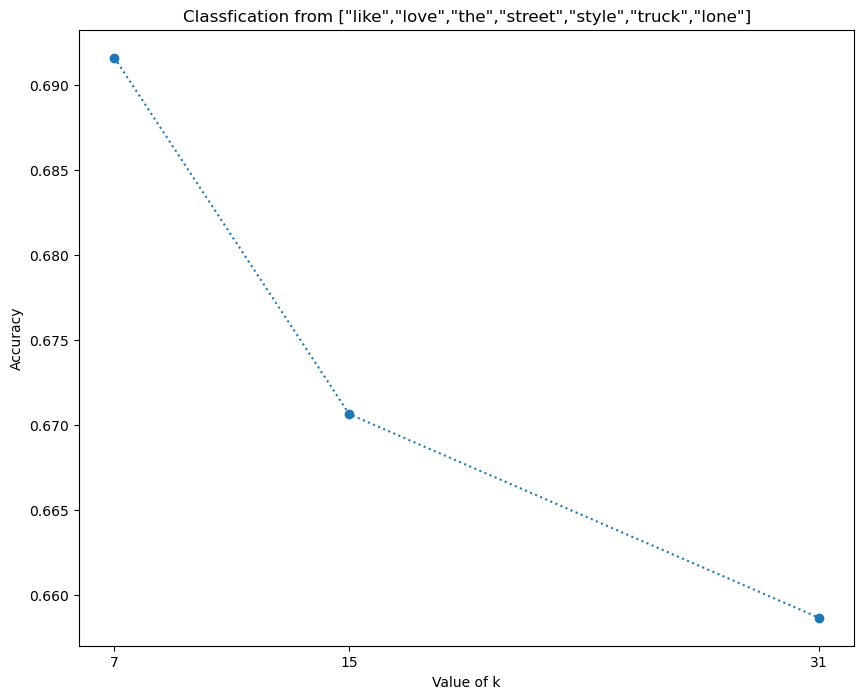

In [81]:
plt.plot([7,15,31], [0.6916167664670658,0.6706586826347305,0.6586826347305389], "o:")

plt.xticks([7,15,31])
plt.ylabel("Accuracy")
plt.xlabel("Value of k")

plt.title('Classfication from ["like","love","the","street","style","truck","lone"]');

K=7 gives the most accurate classifications. If we experimented with the collection of words, then we would be able to make even more accurate classfications